# $$  Boston House Prices - Machine Learning Model $$ 

# Packages and imports 

    # Note: the full execution might take around 2 min due to overload in the "paiplot" command

In [ ]:
from sklearn.datasets import load_boston

#for dataframes
import pandas as pd 

# for data vizualization
import matplotlib.pyplot as plt 
import seaborn as sns

#for data split and training
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#Statsmodels: (for evaluation)
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import numpy as np


%matplotlib inline 



## Data Gathering and Description : 

In [2]:
boston_dataset = load_boston()

[Source: Original research paper](https://deepblue.lib.umich.edu/bitstream/handle/2027.42/22636/0000186.pdf?sequence=1)

### Questions we should ask each time we face a new dataset: 

    #### - Source of the Data? 
    #### - Description of the Dataset? 
    #### - Number of Data points / size? 
    #### - number of features? 
    #### - Name of each feature? 
    #### - Description of the features? 
    

In [3]:
dir(boston_dataset)  # shows the attributes linked to the object between parenthesis  

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [4]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### Data points and features 

In [5]:
type(boston_dataset) # type: bunch

sklearn.utils.Bunch

In [6]:
type(boston_dataset.data)  # inside data are of type numpy.ndarray

numpy.ndarray

In [7]:
boston_dataset.data.shape

(506, 13)

In [8]:
boston_dataset.feature_names   # The features names ( already separated and defined within this dataset)

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [9]:
boston_dataset.target  # the target values ( house price in thousands) also separated and stored in the .target attribute

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

### -------------------------------------------------------------------------------------------------------------------

# Preprocessing : Cleaning the Data

In [10]:
# we retrieve the data from the Boston dataset ( which is of type BUNCH) and identify it's columns names
data = pd.DataFrame(data= boston_dataset.data , columns = boston_dataset.feature_names ) 
# we add the column to the new dataset 
data['PRICE'] = boston_dataset.target

In [11]:
data.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2

In [12]:
data.tail()

CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
501  0.06263  0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527  0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076  0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959  0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741  0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  PRICE  
501     21.0  391.99   9.67   22.4  
502     21.0  396.90   9.08   20.6  
503     21.0  396.90   5.64   23.9  
504     21.0  393.45   6.48   22.0  
505     21.0  396.90   7.88   11.9

In [13]:
data.count()

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
PRICE      506
dtype: int64

## check for missing values:  

In [14]:
pd.isnull(data).any()    # Giving a "TRUE" result for any of the features means we should check that column 

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
PRICE      False
dtype: bool

In [15]:
# OR:  
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


### -------------------------------------------------------------------------------------------------------
# Exploring the DATA: 

## Visualising Data - Histograms, Distributions and Bar Charts 

### * Matplotlib: 

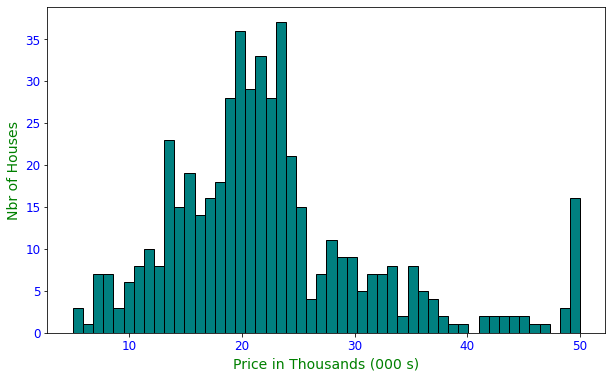

In [16]:
plt.figure(figsize = (10,6))

plt.hist(data['PRICE'], bins = 50 , ec= 'black' , color = 'teal')

# bins : nbr of rectangles
# ec : edge color ( Color of the borders)

plt.xlabel('Price in Thousands (000 s)', fontsize= 14 , color='green')
plt.ylabel('Nbr of Houses', fontsize= 14 , color='green')

plt.xticks(fontsize = 12, color = 'blue')
plt.yticks(fontsize = 12, color = 'blue')

plt.show()

### * Seaborn :

<function matplotlib.pyplot.show(*args, **kw)>

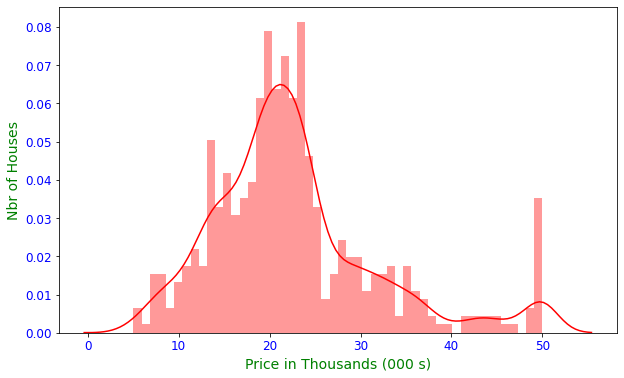

In [17]:
plt.figure(figsize = (10,6))

sns.distplot(data['PRICE'], bins = 50 , color = 'red', hist = True, kde= True )
# hist and kde are the parameters of the histogram display and the probability density function ( the line) display
plt.xlabel('Price in Thousands (000 s)', fontsize= 14 , color='green')
plt.ylabel('Nbr of Houses', fontsize= 14 , color='green')

plt.xticks(fontsize = 12, color = 'blue')
plt.yticks(fontsize = 12, color = 'blue')

plt.show
# "distplot" is the alternative for "hist" in seaborn , it provides a histogram display + the probability density function 

### Let's work on one of the features instead of the target variable, let's plot the number of rooms per house in Boston and see where the average is, from the graf and from the 'mean' method: 

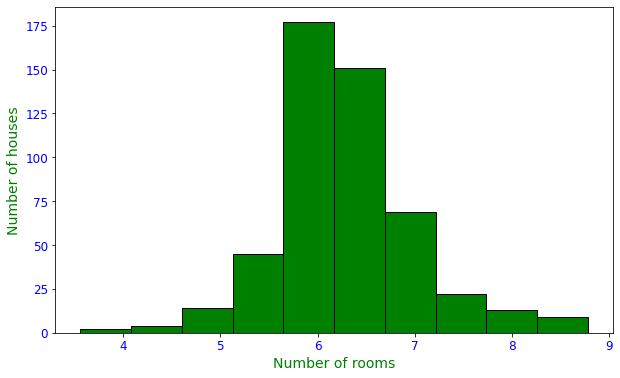

In [18]:
plt.figure(figsize = (10,6))

plt.hist(data['RM'], ec='black' , color = 'green')

plt.xlabel('Number of rooms', fontsize= 14 , color='green')
plt.ylabel('Number of houses', fontsize= 14 , color='green')

plt.xticks(fontsize = 12, color = 'blue')
plt.yticks(fontsize = 12, color = 'blue')

plt.show()

In [19]:
data['RM'].mean()

6.284634387351787

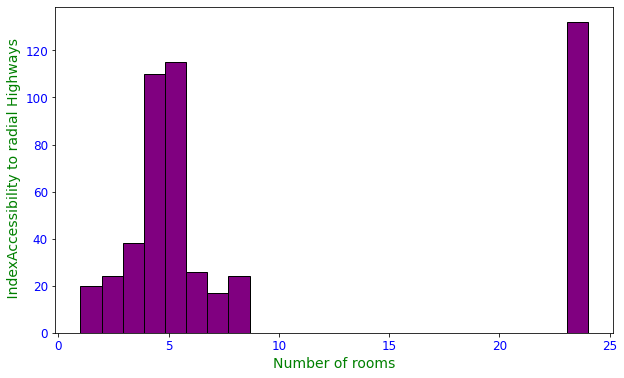

In [20]:
## Another Example: Index of accessibility to Radial Highways: 

plt.figure(figsize = (10,6))

plt.hist(data['RAD'], ec='black' , bins= 24,  color = 'purple')

plt.xlabel('Number of rooms', fontsize= 14 , color='green')
plt.ylabel(' IndexAccessibility to radial Highways', fontsize= 14 , color='green')

plt.xticks(fontsize = 12, color = 'blue')
plt.yticks(fontsize = 12, color = 'blue')


plt.show()

### Or , we can use the Bar chart to replace the histogram: 

In [21]:
frequency = data['RAD'].value_counts()

print('- The first column represents the index ( The values that are being shown within the RAD column)')
print('- the second is for their frequencies')
frequency 

- The first column represents the index ( The values that are being shown within the RAD column)
- the second is for their frequencies


24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
8.0      24
2.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

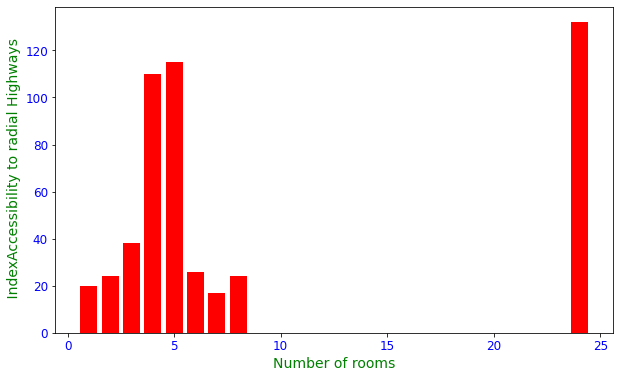

In [22]:
plt.figure(figsize = (10,6))

plt.bar( frequency.index, height= frequency, color='red' ) 
# we can also use "frequency.axes[0]" as an alternative attribute for the  'frequency.index'
plt.xlabel('Number of rooms', fontsize= 14 , color='green')
plt.ylabel(' IndexAccessibility to radial Highways', fontsize= 14 , color='green')

plt.xticks(fontsize = 12, color = 'blue')
plt.yticks(fontsize = 12, color = 'blue')

plt.show()

### To know how many houses are located on the river, we need to use the Value_counts for the Feature 'CHAS'

In [23]:
data['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

In [24]:
print(' - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)')
print(' * there are 35 houses on the river')
print(' * there are 471 houses that are not on the river')

 - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 * there are 35 houses on the river
 * there are 471 houses that are not on the river


## Descriptive statistics

#### some of the important infos we need to get about our dataset are: Mean, Median, Max and min
we can get them either by the attributes:

    data.min()  or data['Feature name'].min() for only one feature 
    data.max()
    data.mean()
    data.median()

or through the data.describe() attribute to get them all at once ( the median will be the 50% index here: 2 quartiles )

In [25]:
data.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT       PRICE  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

## Correlation 

   #### Limitations: 
    # Continious data only
    # Correlation does not necessarily imply causation
    # Linear Relationships only 

## $$ \rho _{XY} = corr (X,Y) $$
## $$ -1.0 \leq \rho _{XY} \leq + 1.0 $$ 

       # ------------ correlation between the ' number of rooms ' and the 'house price' : 

In [26]:
corr1= data['PRICE'].corr(data['RM'])
print('here, we can see that the correlation is around 0.7, which is positive and relatively close to 1 \nIt actually makes a sense because the more rooms the house have, the higher the price is ')
print('Correlation index: ', corr1) 

here, we can see that the correlation is around 0.7, which is positive and relatively close to 1 
It actually makes a sense because the more rooms the house have, the higher the price is 
Correlation index:  0.695359947071539


     # ------------- correlation between the ' Property prices ' and the 'pupil teacher ratio' : 

In [27]:
# PTRATIO is the number of students per teacher, exp: if we have 1 teacher for every 4 students , the ration is then 4
corr2= data['PTRATIO'].corr(data['PRICE'])
print('Here, we can see that the correlation is around -0.5, which is negative \nIt actually makes a sense because the more students per teacher we have, the lower the quality education is \nand so,the lower the house price will be')
print('Correlation index: ', corr2) 

Here, we can see that the correlation is around -0.5, which is negative 
It actually makes a sense because the more students per teacher we have, the lower the quality education is 
and so,the lower the house price will be
Correlation index:  -0.5077866855375615


## OR: 

In [28]:
data.corr() # 'Pearson' Method used to calculate correlation' (Shift + TAB )

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 -0.356977  0.048788 -0.380051  0.128069 -0.273534   
LSTAT    0.455621 -0.412995  0.603800 -0.053929  0.590879 -0.613808  0.602339   
PRICE   -0.388305  0.360445 -0.483725  0.175260 -0.427321  0.695360 -0.376955   

              DIS       RAD       TAX   PTRATIO         B     LSTAT     PRICE  
CRIM    -0.379670  0.625505  0.582764  0.289946 -0.385064  0.455621 -0.388305  
ZN       0.664408 -0.311948 -0.314563 -0.391679  0.175520 -0.412995  0.360445  
INDUS   -0.708027  0.595129  0.720760  0.383248 -0.356977  0.603800 -0.483725  
CHAS    -0.099176 -0.007368 -0.035587 -0.121515  0.048788 -0.053929  0.175260  
NOX     -0.769230  0.611441  0.668023  0.188933 -0.380051  0.590879 -0.427321  
RM       0.205246 -0.209847 -0.292048 -0.355501  0.128069 -0.613808  0.695360  
AGE     -0.747881  0.456022  0.506456  0.261515 -0.273534  0.602339 -0.376955  
DIS      1.000000 -0.494588 -0.534432 -0.232471  0.291512 -0.496996  0.249929  
RAD     -0.494588  1.000000  0.910228  0.464741 -0.444413  0.488676 -0.381626  
TAX     -0.534432  0.910228  1.000000  0.460853 -0.441808  0.543993 -0.468536  
PTRATIO -0.232471  0.464741  0.460853  1.000000 -0.177383  0.374044 -0.507787  
B        0.291512 -0.444413 -0.441808 -0.177383  1.000000 -0.366087  0.333461  
LSTAT   -0.496996  0.488676  0.543993  0.374044 -0.366087  1.000000 -0.737663  
PRICE    0.249929 -0.381626 -0.468536 -0.507787  0.333461 -0.737663  1.000000

### ---------------------------------------------------------------------------------------------

## Now before we move to vizualizing and analyzing our correlation table, let's first define what is Multicollinearity? 

####  - Multicollinearity is Mainly the issue of having two features that are highly related to each other, which affects the correlation index of one or both of them with the target feature. 
####  Meaning, when we do have a Multicollinearity case, we do need to inspect our model and get rid of it, otherwise it will affect the model's accuracy ( unreliable estimaes and non sensical findings). 
####  - However, having a high correlation between features doesn't automatically mean that we have a multicollinearity situation . 
####  - High correlation between our features can be an early warning sign that there is a sort of problem, and we should investigate it.

### -------------------------------------------------------------------------------------------

### ---> The data correlation table contains duplicated values that we need to hide before vizualizing ( symmetry on a diagonal axis)
    # we need to create a mask for our plot 

In [29]:
mask = np.zeros_like(data.corr())  # create a table of zeros having the same dimensions of our corr table
mask

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [30]:
triangle_indices = np.triu_indices_from(mask) # create a triangle of indices for the mask object 
mask[triangle_indices] = True # true is for 1s, false is for 0s ; we now two triangles; for ones and for zeroes
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

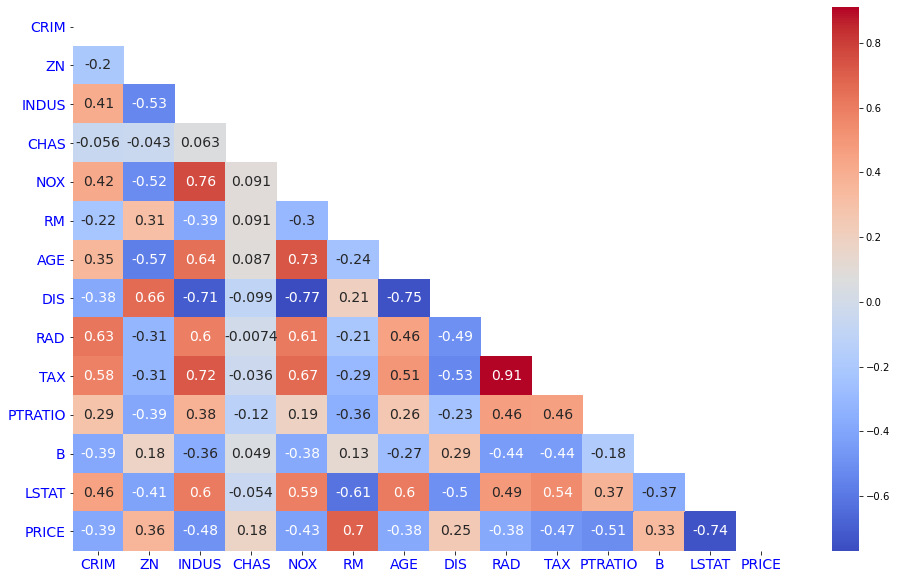

In [31]:
plt.figure(figsize=(16,10))
# we plot the corr table first 
sns.heatmap(data.corr(), cmap="coolwarm", mask = mask, annot = True, annot_kws= {"size": 14}  ) 

# the second mask is the object name, first one is an attribute 
# If passed, data will not be shown in cells where mask is True, Cells with missing values are automatically masked

# annot : shows the correlation values within the plot 
# annot_kws: refers to providing the annot attribute with a size characteristic ( in a form of dictionary )

plt.xticks(fontsize = 14, color = 'blue')  
plt.yticks(fontsize = 14, color = 'blue')

plt.show()

### Now that our plot is ready we can see all the correlation indexes more clearly, let's analyze some samples: 
    #   - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's 
      
      
      
    # Let's take NOX and INDUS: correlation of 0.76 , does it make a sense? yes it does!
      the amout of pollution and number of industires in a town are connected
      
    # TAX and INDUS: 0.72 :  higher tax levels is associated with more indistrual areas

### The Pearson correlation method ( the one used by default by .corr() ) doesn't work for dummy variables , which is the case for features like CHAS ( dummy variables ) or RAD ( discrete variables)  ==> it is only valid for CONTINIOUS variables , Thus the 0.91 correlation value for RAD & TAX is mainly not valid since RAD is not a continious variable

### For our Target value ( PRICE) let's check which of the features is the less correlated ( very weak relationship) ; for this case it will be the CHAS variable, but since it's a dummy, we do reject it and move to the second lowest correlation index; DIS  ( distance from employment centers ) 
    # DIS is not highly correlated with PRICE, but it's highly correlated with INDUS (-0.71) 
    
    # we need to check if DIS adds explanatory value to our Regression model; do we keep it or we just consider INDUS and exclude DIS if it adds no explanatory value to the model 
    # by excluding features , the model becomes more simple, which is better

<function matplotlib.pyplot.show(*args, **kw)>

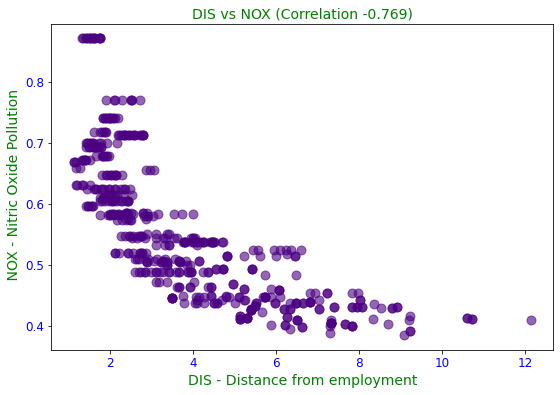

In [32]:
# Scatterplot: 



plt.figure(figsize = (9, 6))

nox_dis_corr= round(data['DIS'].corr(data['NOX']), 3)

plt.scatter(x= data['DIS'], y= data['NOX'], alpha=0.6, s=80, color= 'indigo') 

plt.title( f'DIS vs NOX (Correlation {nox_dis_corr})', fontsize= 14 , color='green') 

# f'string content {variable_name} helps calling variable within the string 

plt.xlabel('DIS - Distance from employment', fontsize= 14 , color='green')
plt.ylabel(' NOX - Nitric Oxide Pollution', fontsize= 14 , color='green')

plt.xticks(fontsize = 12, color = 'blue')
plt.yticks(fontsize = 12, color = 'blue')

plt.show

C:\Users\WINDOWS 10\anaconda3\lib\site-packages\seaborn\axisgrid.py:2264: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


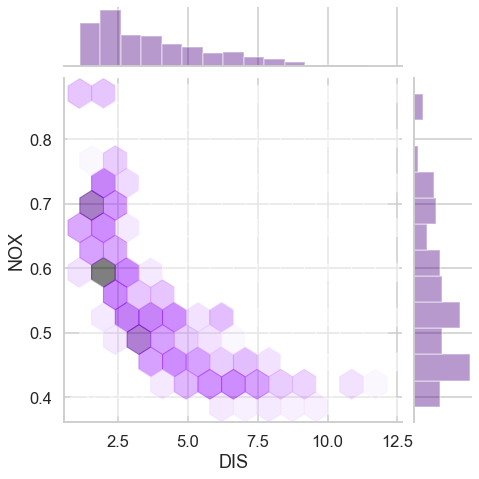

In [33]:
# Jointplot



sns.set() # context : dict, None, or one of {paper, notebook, talk, poster} 

sns.set_context('talk')  
sns.set_style('whitegrid')

sns.jointplot(x= data['DIS'], y= data['NOX'], size= 7, color='indigo', kind = 'hex' ,joint_kws={'alpha':0.5})

# "kind" is a display shape attribute (example: kind = 'hex' for hexagonal-shape points )
# when we don't have a transparency attribute but need it , we create one using dictionary :  joint_kws= {'alpha':0.6}
plt.show()

### As the highest correlation we have is between RAD and TAX, we are going to test the accuracy of this correlation by plotting it, obviously, we won't get a linear distribution of datapoints since we are not using continous data (RAD feature values are shown below) : 

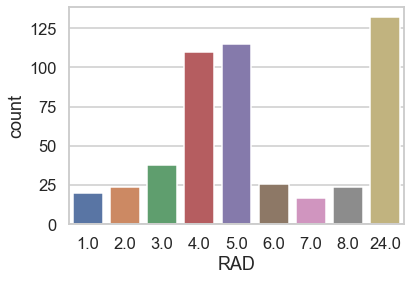

In [34]:
sns.countplot(data['RAD'])

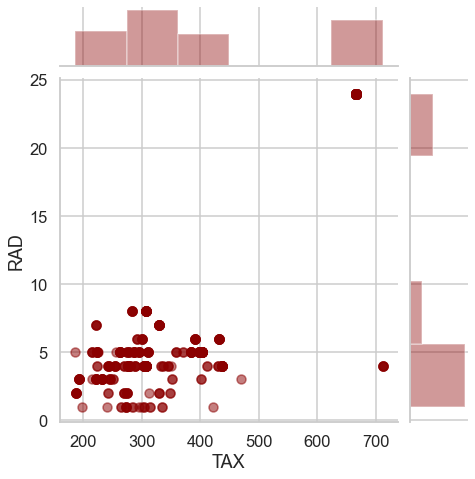

In [35]:
# the Joint plot for RAD and TAX


sns.set()
sns.set_context('talk')  
sns.set_style('whitegrid')

sns.jointplot(x= data['TAX'], y= data['RAD'], size= 7, color='darkred' ,joint_kws={'alpha':0.5})


C:\Users\WINDOWS 10\anaconda3\lib\site-packages\seaborn\regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


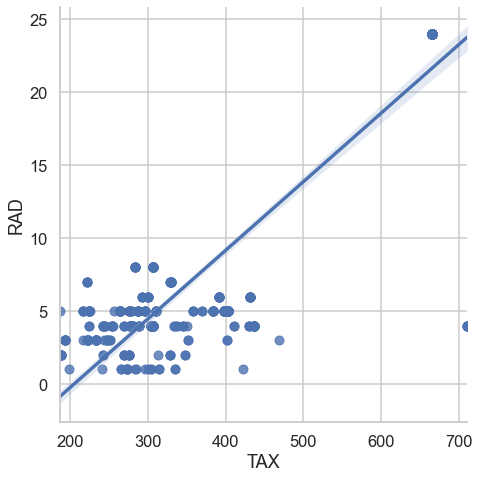

In [36]:
# The Linear Regression for RAD and TAX


sns.lmplot( x='TAX', y='RAD', data= data, size= 7)
plt.show()

### The data points on the top right corner are affecting the slope of the regression significantly. In other words, we are forcing our regression model into a dataset that is not reassly suitable for it. This model isn't that useful to capture the true relationship between our features. 

### -----------------------------------------------------------------------------------------------------

### Let's now figure out the correlation between the Number of Rooms and the Target feature (House Price) 
### Let's Plot a scatterplot as well as a linear regression 

<function matplotlib.pyplot.show(*args, **kw)>

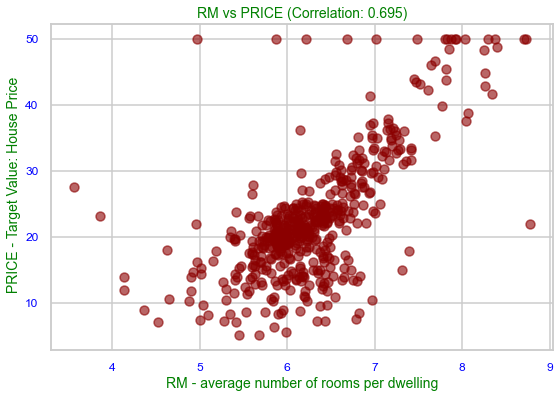

In [37]:
# Scatterplot: 





plt.figure(figsize = (9, 6))

rm_tgt_corr= round(data['RM'].corr(data['PRICE']), 3)

plt.scatter(x= data['RM'], y= data['PRICE'], alpha=0.6, s=80, color= 'darkred') 

plt.title( f'RM vs PRICE (Correlation: {rm_tgt_corr})', fontsize= 14 , color='green') 

# f'string content {variable_name} helps calling variable within the string 

plt.xlabel('RM - average number of rooms per dwelling', fontsize= 14 , color='green')
plt.ylabel(' PRICE - Target Value: House Price', fontsize= 14 , color='green')

plt.xticks(fontsize = 12, color = 'blue')
plt.yticks(fontsize = 12, color = 'blue')

plt.show

C:\Users\WINDOWS 10\anaconda3\lib\site-packages\seaborn\regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


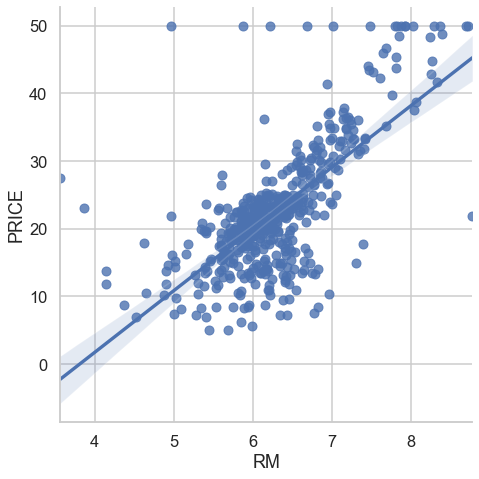

In [38]:
sns.lmplot(x= 'RM', y= 'PRICE', data= data, size=7)

plt.show()

### These two features seems to make more correlation than the first ones ( NOX and DIS)
### ---------------------------------------------------------------------------------------------------

### Now, Let's think like "Lazy Programmers" and plot all the feature combinations with a single algorithm/ command, implementing such a multivariable regression analysis will help easily detect the strong correlations and conclude our features: 

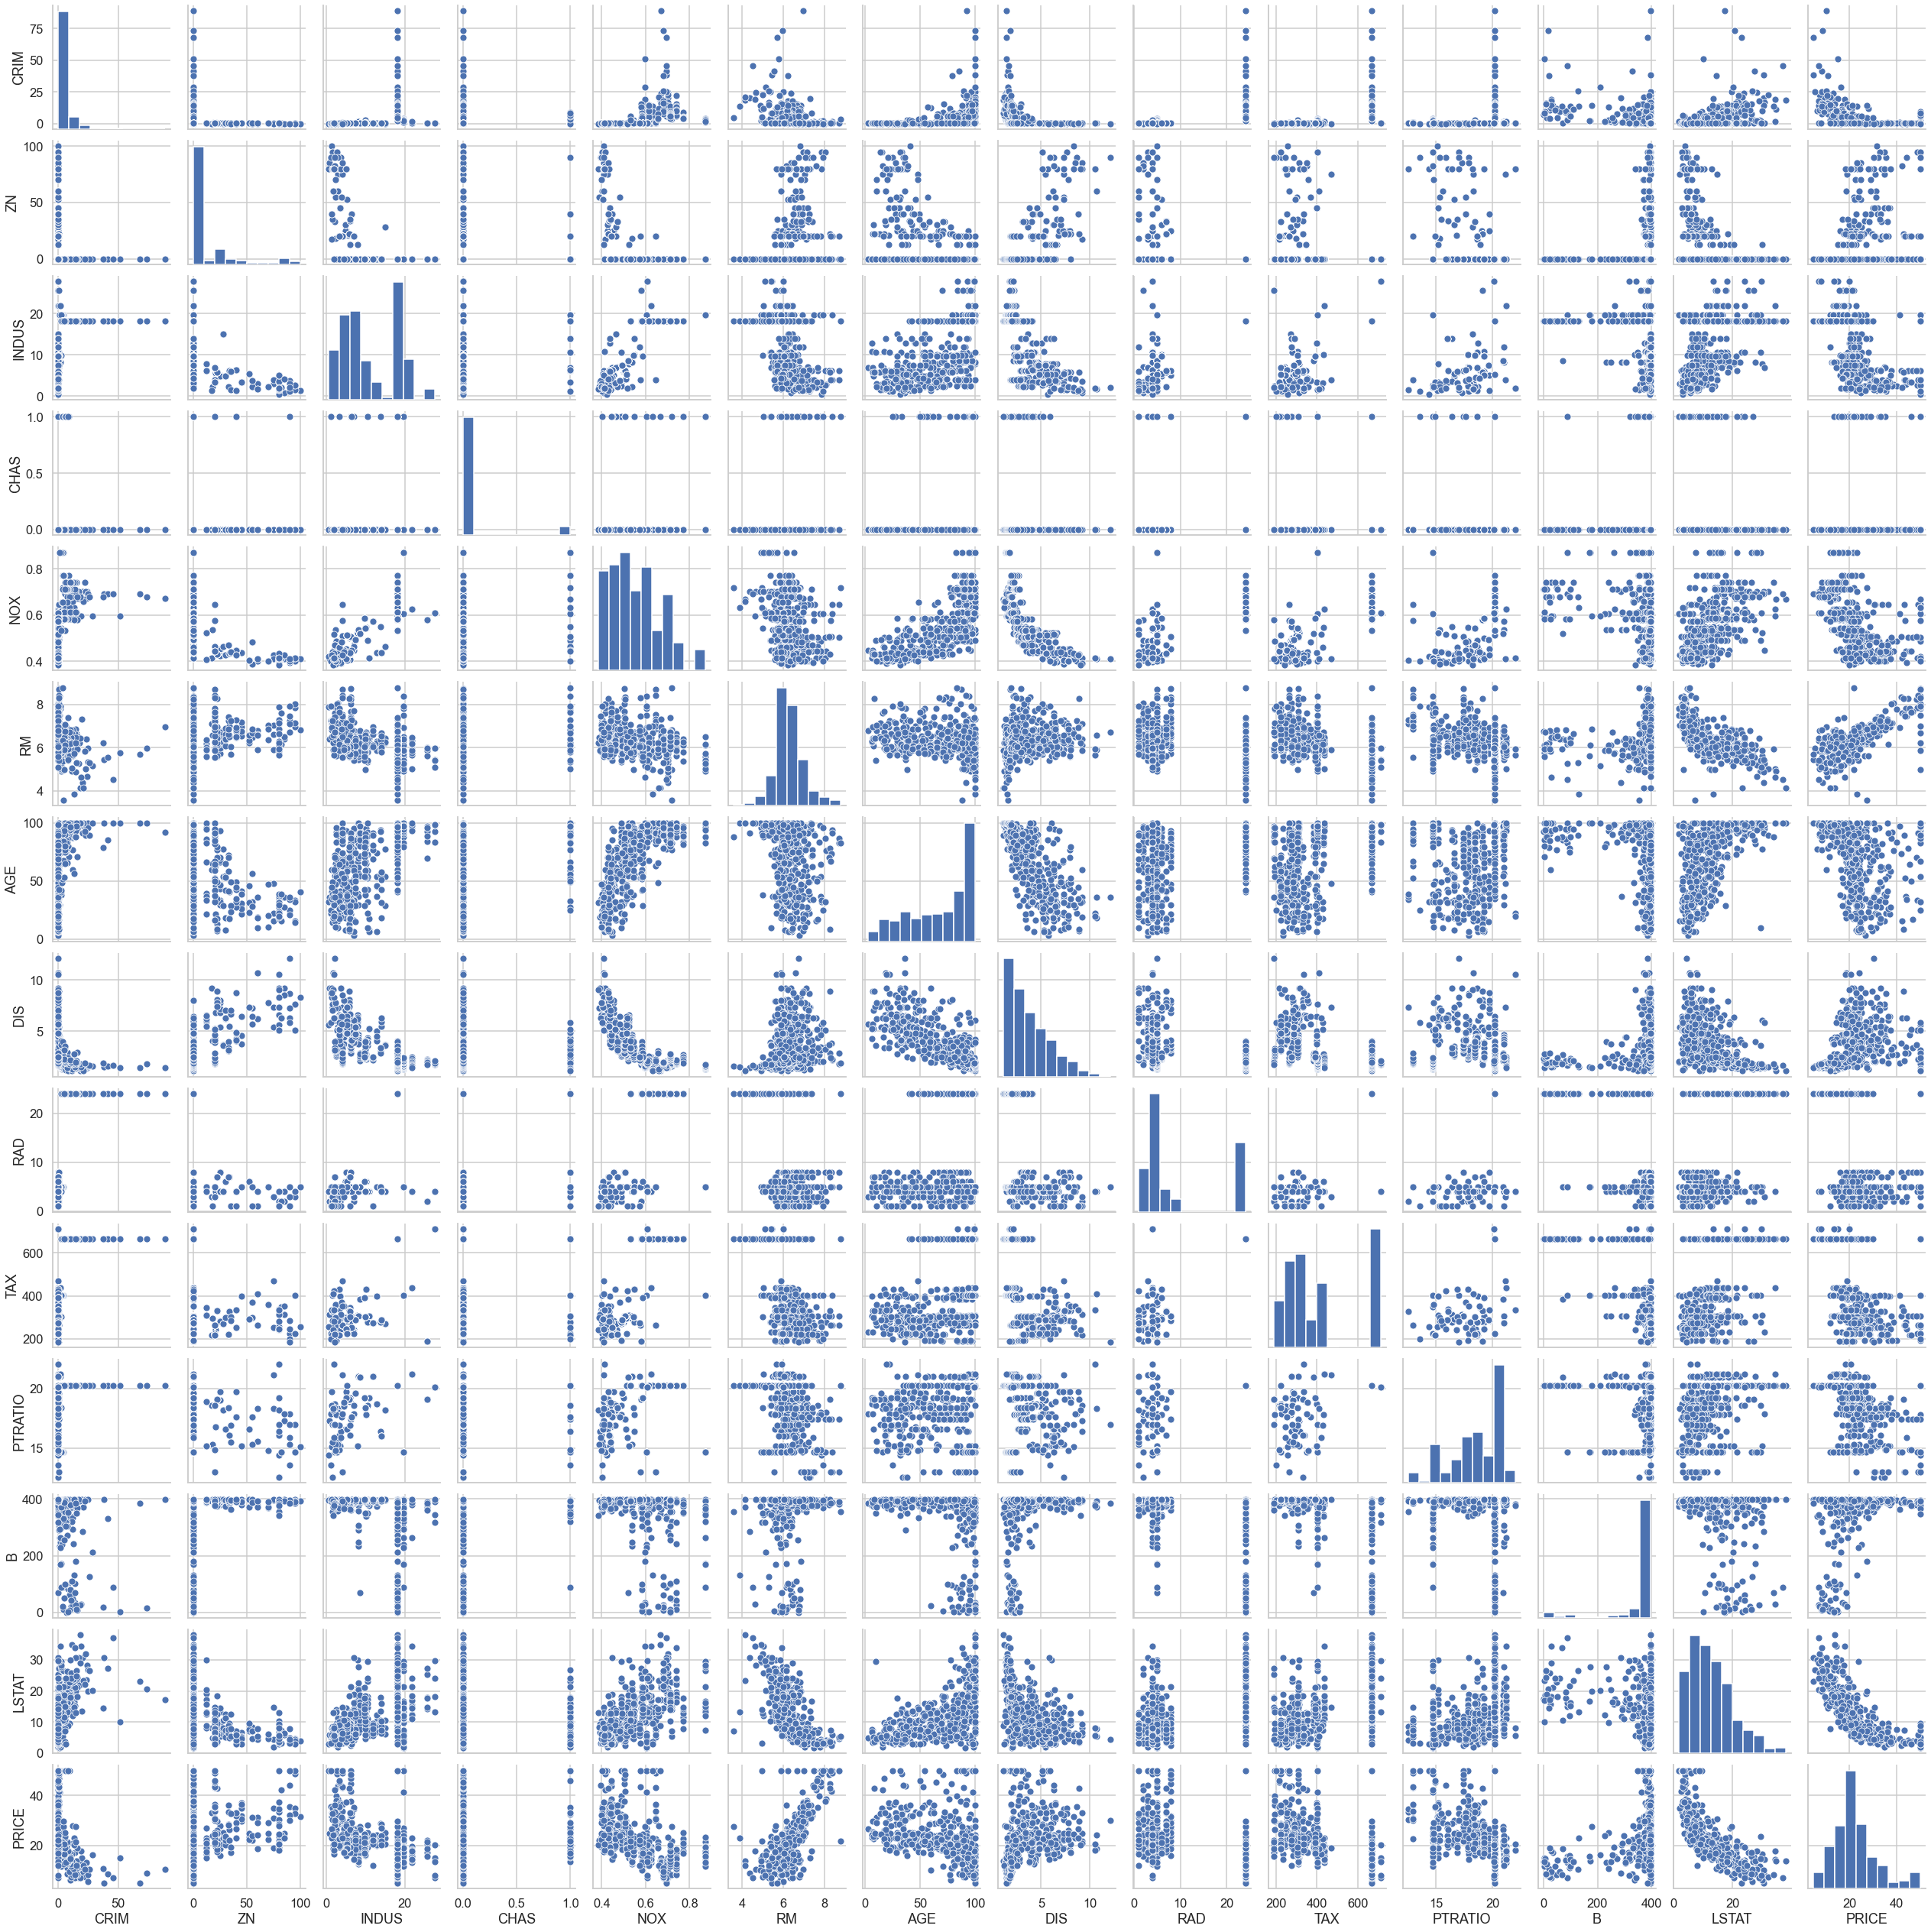

In [39]:
sns.pairplot(data) 
plt.show()

# The default "kind" param for "pairplot" is "Scatterplot"
# In the Diagonal, Pairplot returns the Feature's Histogram. 

### --------------------------------------------------------------------------------------------------------------
# Modeling the Data: 

### Training and Test Data Split: 

In [40]:
prices= data['PRICE']
features= data.drop('PRICE', axis= 1)  # axis = 1 refers to columns , 0 if for rows

x_train, x_test, y_train, y_test = train_test_split( features, prices, test_size= 0.2, random_state= 10)

# random_state is for being able to detect the shuffling when working on an other PC with the same dataset. 
# As long as the Random State index is the same number, the shuffle will give the same result. 



# percentage of training set: (should be around 0.8 (80%) )
len(x_train)/ len(features)

0.7984189723320159

In [41]:
regr= LinearRegression()
regr.fit(x_train, y_train)


print('Training data R-squared :', regr.score(x_train, y_train))
print('Test data R-squared :', regr.score(x_test, y_test))


print('intercept :',  regr.intercept_)
#Create a dataframe of coefficients:
pd.DataFrame(data= regr.coef_ , index= x_train.columns, columns= ['Coefficients'] ) 

#index : is for labeling the data , each coefficient by the correspondant feature name
#columns: by default, the output gets a column name "0", we can rename it using the 'columns' param



Training data R-squared : 0.750121534530608
Test data R-squared : 0.6709339839115628
intercept : 36.53305138282439


Coefficients
CRIM        -0.128181
ZN           0.063198
INDUS       -0.007576
CHAS         1.974515
NOX        -16.271989
RM           3.108456
AGE          0.016292
DIS         -1.483014
RAD          0.303988
TAX         -0.012082
PTRATIO     -0.820306
B            0.011419
LSTAT       -0.581626

### ---------------------------------------------------------------------------------------------------------------------------
# EVALUATION: 

## DATA TRANSFORMATION:  

In [42]:
data['PRICE'].skew()

# The skew of the prices distribution is around 1,1 ; Our Data is RIGHT skewed, since the number is positive
# we need to transform our Price values to get closer to a normal distribution ( for a better fit and more accurate results)

1.1080984082549072

As a transformation option, we can apply the LOG transformation on PRICES and re-fit our model: 

In [43]:
y_log = np.log(data['PRICE'])
y_log.head()

0    3.178054
1    3.072693
2    3.546740
3    3.508556
4    3.589059
Name: PRICE, dtype: float64

In [44]:
y_log.skew()

-0.33032129530987864

Now as we can see, the skew has decreased from 1.1 to -0.3, which is good since we've got closer to 0

In [45]:
#Rounding the two Skew values for the distplot display
ylog_rounded = round(y_log.skew(), 3) 
y_rounded= round(prices.skew(),3 )

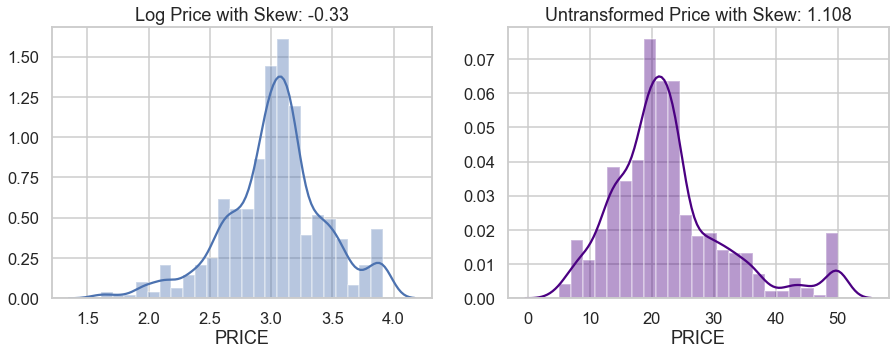

In [46]:
plt.figure(figsize=[15,5]) 

plt.subplot(1,2,1)


sns.distplot(y_log)
plt.title(f'Log Price with Skew: {ylog_rounded}')


plt.subplot(1,2,2)

sns.distplot(data['PRICE'], color='indigo')
plt.title(f'Untransformed Price with Skew: {y_rounded}')

plt.show()

### let's visualize how the transformation makes our data more linear graphically. 

In [47]:
# Let's create a transformed-data dataset first (to be able to compare)
transformed_data= features
transformed_data['LOG_PRICE']= y_log

C:\Users\WINDOWS 10\anaconda3\lib\site-packages\seaborn\regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\WINDOWS 10\anaconda3\lib\site-packages\seaborn\regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


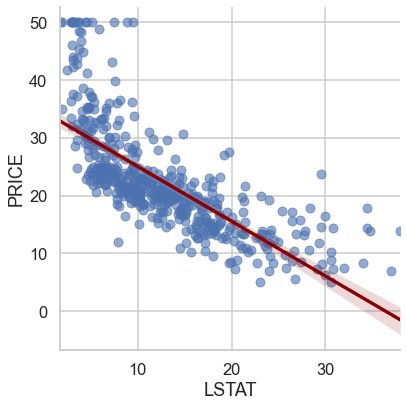

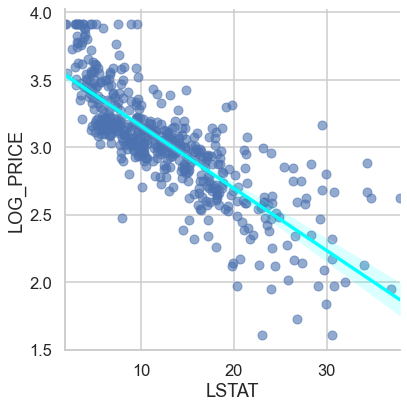

In [48]:

sns.lmplot(x= 'LSTAT', y='PRICE', data= data, size= 6, scatter_kws= {'alpha':0.6}, line_kws= {'color':'darkred'}) 

sns.lmplot(x= 'LSTAT', y='LOG_PRICE', data= transformed_data, size=6,  scatter_kws= {'alpha':0.6}, line_kws= {'color':'cyan'}) 

plt.show()

### As we can see in this first graph , the Regression Line doesn't fit the data as well as it could; The relationship between LSTAT and PRICE might not be a linear one.  However in the second graph, the relationship seems to be more linear. We can notice some kind of fitting improvement. 

In [49]:
prices= transformed_data['LOG_PRICE'] # we are using log prices 
features= transformed_data.drop('LOG_PRICE', axis= 1)  # axis = 1 refers to columns , 0 if for rows

x_train, x_test, y_train, y_test = train_test_split( features, prices, test_size= 0.2, random_state= 10)


regr= LinearRegression()
regr.fit(x_train, y_train)


print('Training data R-squared :', regr.score(x_train, y_train))
print('Test data R-squared :', regr.score(x_test, y_test))


print('intercept :',  regr.intercept_)


pd.DataFrame(data= regr.coef_ , index= x_train.columns, columns= ['Coefficients'] ) 


Training data R-squared : 0.7930234826697583
Test data R-squared : 0.7446922306260724
intercept : 4.05994387177519


Coefficients
CRIM        -0.010672
ZN           0.001579
INDUS        0.002030
CHAS         0.080331
NOX         -0.704068
RM           0.073404
AGE          0.000763
DIS         -0.047633
RAD          0.014565
TAX         -0.000645
PTRATIO     -0.034795
B            0.000516
LSTAT       -0.031390

As we can see, we are using a different model - Based on Log prices - so we will obviously have totally different Thetas as shows the table 
Also, The transformation led to a higher R-squared score for both train and test datasets. Which is a positive result; more accurate fitting. 

### -------------------------------------------------------------------------------- 
## SENSE CHECK:

### To evaluate our model, we need first to apply a "Sense check" on the features; do the correlation and the params sign make a sense or not. 
### This check can be done through this pairplot , by noticing the overall features in general, and the target feature in relation with the other features in particular:  

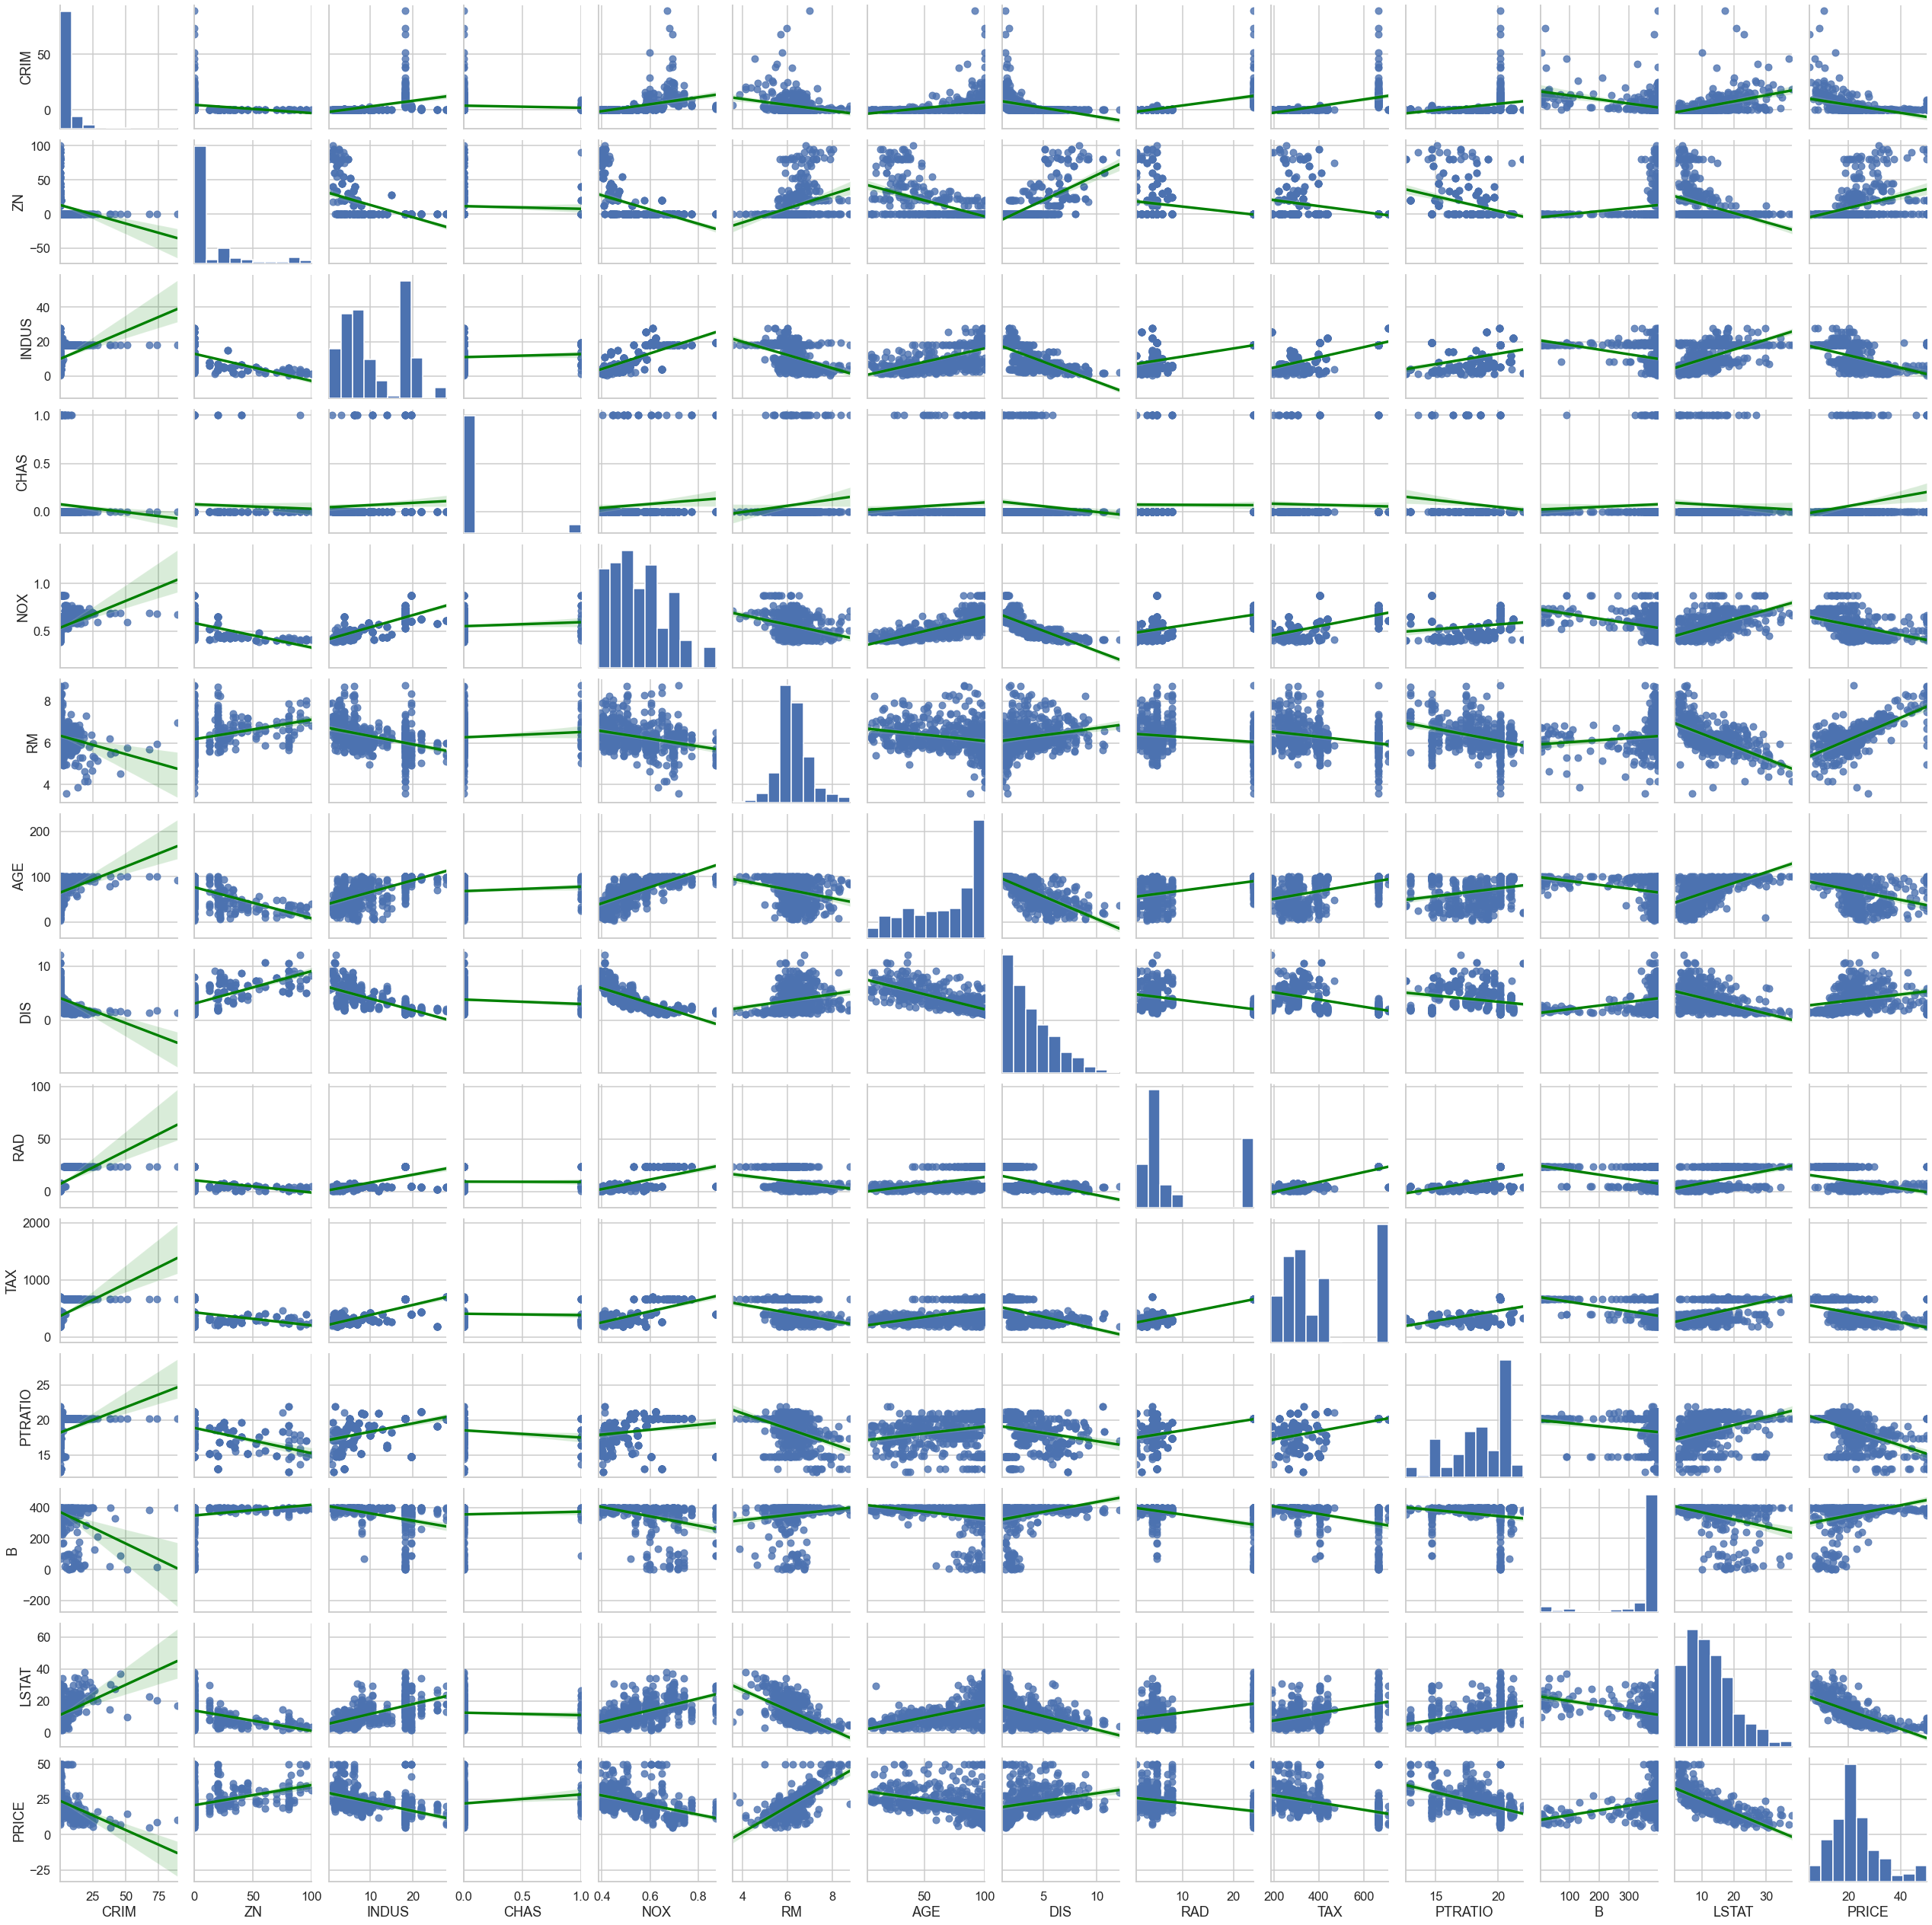

Wall time: 2min 31s


In [50]:
%%time 

sns.pairplot(data, kind='reg', plot_kws= {'line_kws':{'color':'green'}})
plt.show()

# plot_kws containts a nested Dictionary for the "regression line" vizualization (cyan color) 
# here, we've changed the kind into "regression" instead of "scatterplot"

## P-VALUES & EVALUATING COEFFICIENTS: 
    # P-values is a good measure of Feature significance

In [51]:
x_including_const= sm.add_constant(x_train)
x_including_const
# The 'const'column is added to the x_train sample for the purpose of the INTERCEPT

const      CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD  \
50     1.0   0.08873  21.0   5.64   0.0  0.439  5.963   45.7  6.8147   4.0   
367    1.0  13.52220   0.0  18.10   0.0  0.631  3.863  100.0  1.5106  24.0   
34     1.0   1.61282   0.0   8.14   0.0  0.538  6.096   96.9  3.7598   4.0   
78     1.0   0.05646   0.0  12.83   0.0  0.437  6.232   53.7  5.0141   5.0   
172    1.0   0.13914   0.0   4.05   0.0  0.510  5.572   88.5  2.5961   5.0   
..     ...       ...   ...    ...   ...    ...    ...    ...     ...   ...   
320    1.0   0.16760   0.0   7.38   0.0  0.493  6.426   52.3  4.5404   5.0   
15     1.0   0.62739   0.0   8.14   0.0  0.538  5.834   56.5  4.4986   4.0   
484    1.0   2.37857   0.0  18.10   0.0  0.583  5.871   41.9  3.7240  24.0   
125    1.0   0.16902   0.0  25.65   0.0  0.581  5.986   88.4  1.9929   2.0   
265    1.0   0.76162  20.0   3.97   0.0  0.647  5.560   62.8  1.9865   5.0   

       TAX  PTRATIO       B  LSTAT  
50   243.0     16.8  395.56  13.45  
367  666.0     20.2  131.42  13.33  
34   307.0     21.0  248.31  20.34  
78   398.0     18.7  386.40  12.34  
172  296.0     16.6  396.90  14.69  
..     ...      ...     ...    ...  
320  287.0     19.6  396.90   7.20  
15   307.0     21.0  395.62   8.47  
484  666.0     20.2  370.73  13.34  
125  188.0     19.1  385.02  14.81  
265  264.0     13.0  392.40  10.45  

[404 rows x 14 columns]

In [52]:
model = sm.OLS(y_train, x_including_const) 
results = model.fit()
#OLS stands for Ordinary Least Squares , which gives a linear regression just like sickit learn
# In the case of sm.OLS, the features need to be updated with the intercept first. 

In [53]:
results.params

const      4.059944
CRIM      -0.010672
ZN         0.001579
INDUS      0.002030
CHAS       0.080331
NOX       -0.704068
RM         0.073404
AGE        0.000763
DIS       -0.047633
RAD        0.014565
TAX       -0.000645
PTRATIO   -0.034795
B          0.000516
LSTAT     -0.031390
dtype: float64

In [54]:
results.pvalues

const      1.188124e-52
CRIM       1.753774e-14
ZN         8.607727e-03
INDUS      4.445368e-01
CHAS       3.824015e-02
NOX        2.729624e-05
RM         1.089112e-04
AGE        2.091731e-01
DIS        1.812912e-07
RAD        3.746363e-07
TAX        5.145680e-05
PTRATIO    7.549821e-09
B          6.326839e-06
LSTAT      3.105305e-37
dtype: float64

### DataFrame containing both params and P-values: 

### The P-value is rounded to three numbers only since our interest is to compare it to '0.05' as a default threshhold.  
#### * if P-value is < 0.05 : the Feature is significant and should be considered 
#### * if p-value is > 0.05, the Feature isn't significant and , mostly, it should be eliminated. 

In [55]:
pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})


coef  p-value
const    4.059944    0.000
CRIM    -0.010672    0.000
ZN       0.001579    0.009
INDUS    0.002030    0.445
CHAS     0.080331    0.038
NOX     -0.704068    0.000
RM       0.073404    0.000
AGE      0.000763    0.209
DIS     -0.047633    0.000
RAD      0.014565    0.000
TAX     -0.000645    0.000
PTRATIO -0.034795    0.000
B        0.000516    0.000
LSTAT   -0.031390    0.000

For this set of features, we can notice that INDUS (p-value= 0.445) & AGE (p-value= 0.209) are above the Threshhold (0.05), which mean that they are quite not significant

## TESTING FOR MULTICOLLINEARITY

Multicollinearity is when one or two predictor variables in our regression are highly related to one another. 
In that case, they do not provide a unique or independent information to the model, and the consequences of MULTICOLLINEARITY are as follows: 
    
    # Loss of reliability
    # High variability in the Theta estimates ( adding or removing a feature can have dramatic effects ) 
    # Strange findings ( non sense correlations/ relationships between features) :
         (This one is already passed since we already did the sense check)
         
      
      
#### One of the Symptoms of Multicollinearity is unstable coefficients
        


### In addition to the Sense Check we do have the Formal Check: 
## VARIANCE INFLATION FACTOR (VIF) :   
    VIF  >  Threshhold ? 

## $$ TAX = \alpha_0 + \alpha_1 RM + \alpha_2 NOX + ... + \alpha_{12} LSTAT $$ 

## $$ VIF_{TAX} = \frac{1}{ (1 - R_{TAX}^2)  } $$

In [56]:
type(x_including_const)

pandas.core.frame.DataFrame

In [57]:
variance_inflation_factor(exog= x_including_const.values , exog_idx = 1 ) 
# one is for feature n°1 ( since index 0 is now occupied by the constant we've already added)
# we must extract values from "x_including_const" since it's of type "DataFrame" and we need an ndArray type
    
    # Parameters : 
            #exog ( n-dimensional array : ndarray ) 
            #design matrix with all explanatory variables, as for example used in regression

            #: exog_idx ( int )
            #index of the exogenous variable in the columns of exog : The column's index we want to look at
            

    # Returns : 
            #vif ( float ) : variance inflation factor

1.7145250443932485

### A loop that prints all the VIF values: 

In [58]:
for i in range (len(x_including_const.columns)) :
    print ( round(variance_inflation_factor(exog= x_including_const.values , exog_idx = i ),3))
    
print ('All done!') 

597.549
1.715
2.333
3.943
1.079
4.41
1.84
3.327
4.223
7.314
8.509
1.84
1.339
2.813
All done!


### we can create a list "vif[ ]" including this loop and save all the values into that list:

In [59]:
vif = [variance_inflation_factor(exog= x_including_const.values , exog_idx = i ) for i in range (x_including_const.shape[1]) ]
vif 

[597.5487126763895,
 1.7145250443932485,
 2.3328224265597584,
 3.943448822674636,
 1.0788133385000578,
 4.410320817897635,
 1.8404053075678568,
 3.3267660823099408,
 4.222923410477865,
 7.314299817005058,
 8.508856493040817,
 1.839911632651406,
 1.3386713255364715,
 2.812544292793034]

### -For a better display, let's create a dataframe containing both feature names and correspondant VIFs: 

In [60]:
pd.DataFrame({'Coef_name': x_including_const.columns , 'VIF': np.around(vif, 2) })

#np.around is for rounding the vif to only 2 digits

Coef_name     VIF
0      const  597.55
1       CRIM    1.71
2         ZN    2.33
3      INDUS    3.94
4       CHAS    1.08
5        NOX    4.41
6         RM    1.84
7        AGE    3.33
8        DIS    4.22
9        RAD    7.31
10       TAX    8.51
11   PTRATIO    1.84
12         B    1.34
13     LSTAT    2.81

#### Just like for the P-values, we do compare those numbers to the VIF Threshhold. 
#### The scientific consensus seems to be that the threshhold for VIF is around 10 , meaning that all our values are under the threshhold. 
### Based on that, There is NO MULTICOLLINEARITY to be afraid of for our features set; there is no need to Eliminate any. 

## MODEL SIMPLIFICATION AND THE BIC (Beyes Information Criteria):
    # The lower is the BIC, the better our model is

In [61]:
# Original Model with all features and log prices:

x_including_const= sm.add_constant(x_train) 


model = sm.OLS(y_train, x_including_const) 
results = model.fit()


original_coef = pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})

print('BIC is :', results.bic )
print('R-squared is :', results.rsquared)


BIC is : -139.74997769478875
R-squared is : 0.7930234826697582


In [62]:
# Reduced Model #1 : with INDUS excluded 

x_including_const= sm.add_constant(x_train)
x_including_const= x_including_const.drop(['INDUS'], axis= 1)

model = sm.OLS(y_train, x_including_const) 
results = model.fit()


coef_minus_indus = pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})

print('BIC is :', results.bic )
print('R-squared is :', results.rsquared)


BIC is : -145.14508855591163
R-squared is : 0.7927126289415163


As we can see, Removing the INDUS predictor affected the BIC and led it to a lower value (-145 < -139 ). 
Meanwhile , the R-squared value almost remained at 0.79, which is a positive result.

In [63]:
# Reduced Model #2 : with both INDUS & AGE excluded 

x_including_const= sm.add_constant(x_train)
x_including_const= x_including_const.drop(['INDUS','AGE'], axis= 1)

model = sm.OLS(y_train, x_including_const) 
results = model.fit()


reduced_coef = pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})

print('BIC is :', results.bic )
print('R-squared is :', results.rsquared)


BIC is : -149.49934294224656
R-squared is : 0.7918657661852815


Removing AGE in addition to INDUS predictor affected the BIC once again and led it to an even lower value (-149 < -145 ). 
Meanwhile , the R-squared value almost remained at 0.79 once again, which is quite good! 

In [64]:
frames = [original_coef, coef_minus_indus, reduced_coef]
pd.concat(frames, axis = 1 ) 

coef  p-value      coef  p-value      coef  p-value
const    4.059944    0.000  4.056231    0.000  4.035922    0.000
CRIM    -0.010672    0.000 -0.010721    0.000 -0.010702    0.000
ZN       0.001579    0.009  0.001551    0.010  0.001461    0.014
INDUS    0.002030    0.445       NaN      NaN       NaN      NaN
CHAS     0.080331    0.038  0.082795    0.032  0.086449    0.025
NOX     -0.704068    0.000 -0.673365    0.000 -0.616448    0.000
RM       0.073404    0.000  0.071739    0.000  0.076133    0.000
AGE      0.000763    0.209  0.000766    0.207       NaN      NaN
DIS     -0.047633    0.000 -0.049394    0.000 -0.052692    0.000
RAD      0.014565    0.000  0.014014    0.000  0.013743    0.000
TAX     -0.000645    0.000 -0.000596    0.000 -0.000590    0.000
PTRATIO -0.034795    0.000 -0.034126    0.000 -0.033481    0.000
B        0.000516    0.000  0.000511    0.000  0.000518    0.000
LSTAT   -0.031390    0.000 -0.031262    0.000 -0.030271    0.000

####  Despite teaking the model and eliminating INDUS and AGE, all the remaining Coeffs are remarkably consistent
#### Meaning , even though there is a slight change in their values, they don't change signs or change drastically. 
    ==> These are stable Coefficient estimates. 

# Residuals & Residual plots : 

In [65]:
#Modified Model: transformed (using log prices) & simplified (dropping two features)

prices= np.log(data['PRICE'])  # we are using log prices 
features= data.drop(['PRICE', 'INDUS', 'AGE'], axis= 1) 

x_train, x_test, y_train, y_test = train_test_split( features, prices, test_size= 0.2, random_state= 10)


# using statsmodels
x_including_const= sm.add_constant(x_train)

model = sm.OLS(y_train, x_including_const) # Y is putted first for the Regression using OLS (differs from LinearRegression)
results = model.fit()

In [66]:
#Residuals 
residuals = y_train - results.fittedvalues #fittedvalues is an attribute for the values returned by the model (Y predicted)
residuals #"residuals" will be of type dataframe
# OR Directly:  results.resid (resid is a predifined attribute)

50    -0.056143
367    0.498215
34    -0.033868
78     0.043520
172    0.033242
         ...   
320   -0.041251
15    -0.033156
484    0.074891
125    0.008542
265   -0.214594
Length: 404, dtype: float64

In [67]:
residuals.describe()

count    4.040000e+02
mean    -3.119617e-15
std      1.841779e-01
min     -7.330963e-01
25%     -9.881733e-02
50%     -1.499545e-02
75%      9.870289e-02
max      7.907087e-01
dtype: float64

In [68]:
corr = round(y_train.corr(results.fittedvalues), 2)
corr # Correlation between actual and predicted values: 


0.89

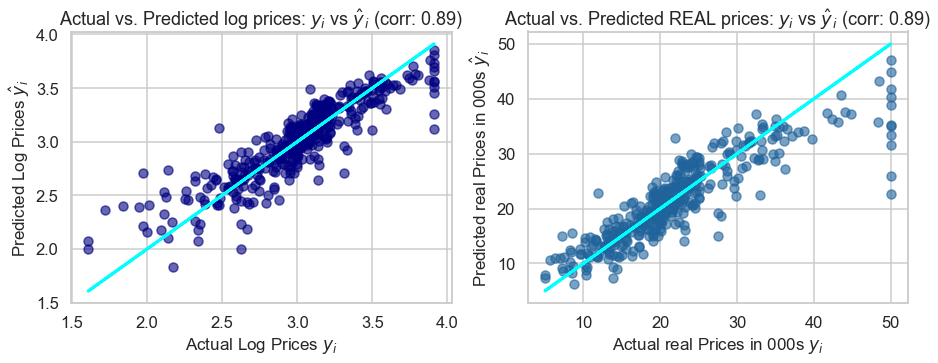

In [79]:
# Graph of Actual VS. Predicted  "LOG" Prices 

plt.figure(figsize=[15,5])

plt.subplot(1,2,1)
plt.scatter(x=y_train , y= results.fittedvalues, c='navy', alpha =0.6 )
plt.plot(y_train, y_train, color='cyan', linewidth= 3) # The diagonal line measuring a perfect prediction with 0 residuals


plt.xlabel('Actual Log Prices $ y_i $ ', fontsize = 17)   #$$ are for latex syntax inside the labels 
plt.ylabel('Predicted Log Prices $ \hat y_i $ ', fontsize = 17) 
plt.title(f'Actual vs. Predicted log prices: $y_i$ vs $\hat y_i $ (corr: {corr})')


plt.subplot(1,2,2) 

# Graph of Actual VS. Predicted Initial Prices

plt.scatter(x=np.e**(y_train) , y= np.e**(results.fittedvalues), c='#20639B', alpha =0.6 )
plt.plot(np.e**(y_train), np.e**(y_train), color='cyan', linewidth= 3)


plt.xlabel('Actual real Prices in 000s $ y_i $ ', fontsize = 17)   #$$ are for latex syntax inside the labels 
plt.ylabel('Predicted real Prices in 000s $ \hat y_i $ ', fontsize = 17) 
plt.title(f'Actual vs. Predicted REAL prices: $y_i$ vs $\hat y_i $ (corr: {corr})')

plt.show()


#Mean squared error and  & R-squared  
reduced_log_mse = round(results.mse_resid, 3)
reduced_log_rsquared = round(results.rsquared, 3)

## The residual points in the extreme right for both plots are explained by the outlier values within the dataset: (at 50,000 USD)

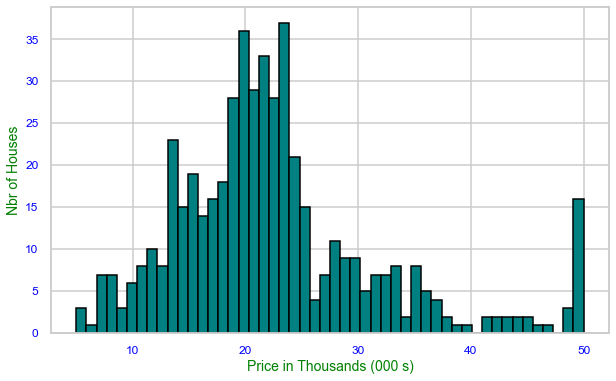

In [70]:
plt.figure(figsize = (10,6))

plt.hist(data['PRICE'], bins = 50 , ec= 'black' , color = 'teal')

# bins : nbr of rectangles
# ec : edge color ( Color of the borders)

plt.xlabel('Price in Thousands (000 s)', fontsize= 14 , color='green')
plt.ylabel('Nbr of Houses', fontsize= 14 , color='green')

plt.xticks(fontsize = 12, color = 'blue')
plt.yticks(fontsize = 12, color = 'blue')

plt.show()

### Now, let's plot the predicted prices in function of Residuals : 

Text(0.5, 1.0, 'Residuals vs. Predicted Log prices $\\hat y_i $')

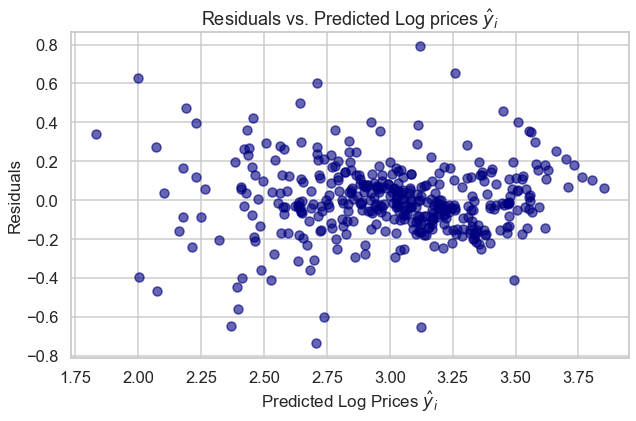

In [71]:
#Graph of Predicted Vs Residuals: 
plt.figure(figsize=[10,6])
plt.scatter(x=results.fittedvalues , y= results.resid, c='navy', alpha =0.6 )


plt.xlabel('Predicted Log Prices $ \hat y_i $ ', fontsize = 17)   #$$ are for latex syntax inside the labels 
plt.ylabel('Residuals', fontsize = 17) 
plt.title(f'Residuals vs. Predicted Log prices $\hat y_i $')

As we can notice, most of the datapoints are centered and does not seem to have a specific pattern, the residuals show a positive result

In [72]:
# Distribution for residuals - Checking for normality 
resid_mean = round(results.resid.mean(), 3) 
resid_skew = round(results.resid.skew(), 3) 

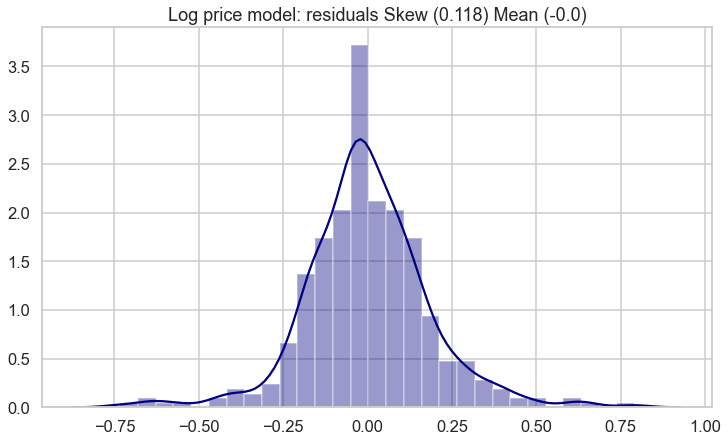

In [73]:
plt.figure(figsize=[12,7])
sns.distplot(results.resid, color= 'navy')
plt.title(f'Log price model: residuals Skew ({resid_skew}) Mean ({resid_mean})' ) 
plt.show()

### -------------------------------------------------------------------------------------------------------------------------------------
## For the case of the Original model : "All features" & Normal Prices (not exposed to Log)

### - Remodelling the Data: ( to avoid errors) 

In [78]:
target = data['PRICE']
allfeatures = data.drop(['PRICE'], axis = 1)

x_train1, x_test1, y_train1, y_test1 = train_test_split( allfeatures, target, test_size= 0.2, random_state= 10)
x_train1_const = sm.add_constant(x_train1)  #for the exog ; should contain an intercept


model1 = sm.OLS(y_train1, x_train1_const )
results1 = model1.fit()

corr1 = round(y_train1.corr(results1.fittedvalues), 3) # Correlation between actual and predicted values


### - Graph of Actual VS. Predicted  normal Prices (all features included)

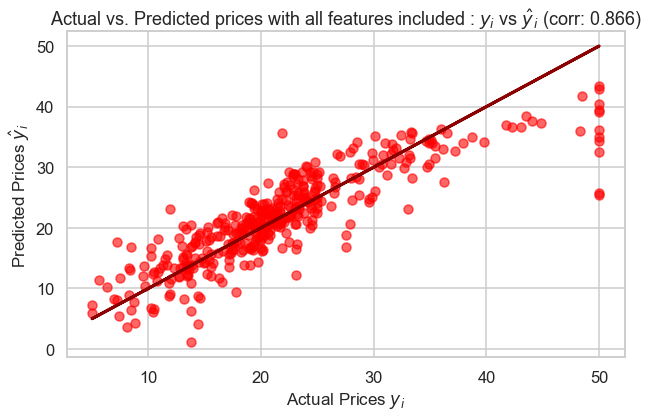

In [80]:
# Graph of Actual VS. Predicted  normal Prices (all features included)

plt.figure(figsize=[10,6])

plt.scatter(x=y_train1 , y= results1.fittedvalues, c='red', alpha =0.6 )
plt.plot(y_train1, y_train1, color='darkred', linewidth= 3) # The diagonal line measuring a perfect prediction with 0 residuals


plt.xlabel('Actual Prices $ y_i $ ', fontsize = 17)   #$$ are for latex syntax inside the labels 
plt.ylabel('Predicted Prices $ \hat y_i $ ', fontsize = 17) 
plt.title(f'Actual vs. Predicted prices with all features included : $y_i$ vs $\hat y_i $ (corr: {corr1})')

plt.show()


#Mean squared error and  & R-squared  
full_normal_mse = round(results.mse_resid, 3)
full_normal_rsquared = round(results.rsquared, 3)

- The first graph and this one here seems pretty much similar ( same shape and close correlation values : 8.9 and 8.66 ) , 

### - Graph of Predicted Prices VS. Residuals: 

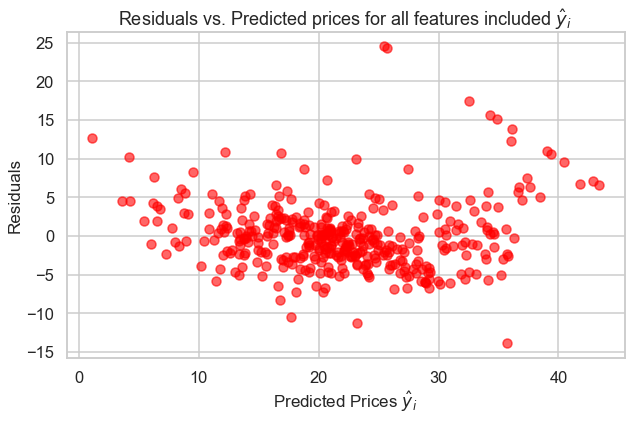

In [76]:
#Graph of Predicted Vs Residuals: 
plt.figure(figsize=[10,6])
plt.scatter(x=results1.fittedvalues , y= results1.resid, c='red', alpha =0.6 )


plt.xlabel('Predicted Prices $ \hat y_i $ ', fontsize = 17)   #$$ are for latex syntax inside the labels 
plt.ylabel('Residuals', fontsize = 17) 
plt.title(f'Residuals vs. Predicted prices for all features included $\hat y_i $')

plt.show()

### - Distribution for residuals 

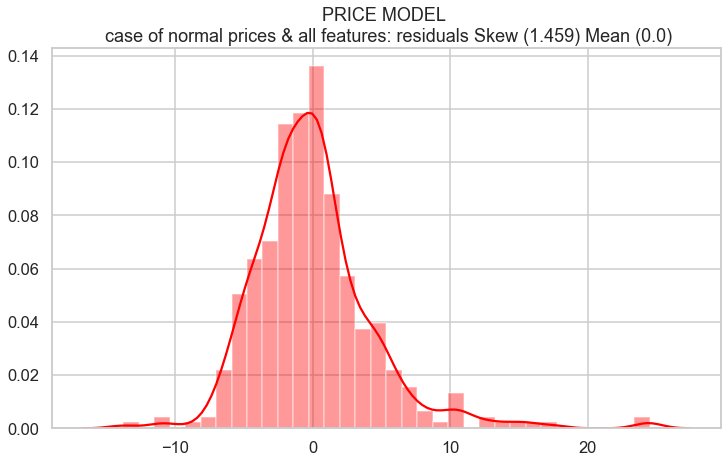

In [77]:
# Distribution for residuals 
resid1_mean = round(results1.resid.mean(), 3) 
resid1_skew = round(results1.resid.skew(), 3) 


plt.figure(figsize=[12,7])
sns.distplot(results1.resid, color= 'red')
plt.title(f'PRICE MODEL \n case of normal prices & all features: residuals Skew ({resid1_skew}) Mean ({resid1_mean})' ) 
plt.show()

### A distribution of residuals that is not close to a normal distribution (skew is around 1.5) makes things much more difficult when it comes to making predictions and forecasts. 

# Predictions: 

###  As a reminder: 

 #### Mean squared error ( MSE ) = $ \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2 $
 #### Root Mean Squared Error RMSE (St. dev)  =  $ \sqrt{ MSE } $ 
 #### R-squared = 1 - RSS/ TSS 

In [91]:
## MSE , R-squared & RMSE 

pd.DataFrame ({'R-squared':[ reduced_log_rsquared, full_normal_rsquared ] ,
              'MSE': [reduced_log_mse, full_normal_mse] , 
              'RMSE':[np.sqrt(reduced_log_mse), np.sqrt(full_normal_mse)]} , 
              index =['Reduced Log Model', 'Full Normal Price Model'])


R-squared    MSE      RMSE
Reduced Log Model            0.792  0.035  0.187083
Full Normal Price Model      0.792  0.035  0.187083

In [97]:
# for a 95% prediction interval using reduced Log model : 

print (' 1 st. dev in log prices is :', np.sqrt(reduced_log_mse) )
print (' 2 st. dev in log prices is :', 2*np.sqrt(reduced_log_mse) )

# Let's pick a house price of 30,000 $ in average, and calculate it's upper and lower bound for a 95% prediction interval 

upper_bound = np.log(30) + 2*np.sqrt(reduced_log_mse)
lower_bound = np.log(30) - 2*np.sqrt(reduced_log_mse)

print('- The upper bound in log prices for 95% prediction interval is ', upper_bound)
print('  -> The upper bound in normal prices is $', np.e**(upper_bound)*1000 ) 
print('- The lower bound in log prices for 95% prediction interval is ', lower_bound)
print('  -> The lower bound in normal prices is $', np.e**(lower_bound)*1000 )

 1 st. dev in log prices is : 0.18708286933869708
 2 st. dev in log prices is : 0.37416573867739417
- The upper bound in log prices for 95% prediction interval is  3.7753631203395495
  -> The upper bound in normal prices is $ 43613.34233239937
- The lower bound in log prices for 95% prediction interval is  3.0270316429847615
  -> The lower bound in normal prices is $ 20635.886906824155
